# Sales and Customer Data EDA Report

## Objective:

This EDA PReport is aimed at unvelining hidden insights between two sample sales and customer datasets. The main focus is the customer distribution in attempts to drive data driven strtegies that can have a positive impact on customer experience and sales.

## Table Of Contents
1. Loading the libraries
2. Loading the datasets
3. Wrangling the datasets:
   1) Combining the datasets
   2) Cleaning the datasets
4. Mining the data for insights:
   1) KPIs
   2) Univariate analysis
   3) Bivariate analysis
   4) Multivariate analysis

### Loading the Libraries

In [1]:
## importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import sklearn
import xgboost
import matplotlib.pyplot as plt

### Loading the datasets

In [2]:
## importing the datasets

customers = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\customer_data.csv")
sales = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\sales_data.csv")

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_13964\2905352407.py:3: SyntaxWarning: invalid escape sequence '\o'
  customers = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\customer_data.csv")
C:\Users\Alvin\AppData\Local\Temp\ipykernel_13964\2905352407.py:4: SyntaxWarning: invalid escape sequence '\o'
  sales = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\sales_data.csv")


In [3]:
## exploring the data 

customers.head()

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [4]:
sales.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,5/8/2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12/12/2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,9/11/2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16/05/2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24/10/2021,Kanyon


### Wrangling the datasets

#### 1. Combining the datasets

In [5]:
## joining the two columns

inner_merge_df = pd.merge(customers, sales, on="customer_id", how="inner") ## doing an inner join
left_merge_df = pd.merge(customers, sales, on= "customer_id", how="left") ## doing a left join
right_merge_df = pd.merge(customers, sales, on="customer_id", how="right") ## doing a right join
data = pd.merge(customers, sales, on="customer_id", how="outer")  ## doing a full outer join

In [6]:
## checking the first 5 columns

inner_merge_df.head()

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,5/8/2022,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,12/12/2021,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,9/11/2021,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,16/05/2021,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,24/10/2021,Kanyon


In [7]:
## checking the length of the innner join

inner_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
 4   invoice_no      99457 non-null  object 
 5   category        99457 non-null  object 
 6   quantity        99457 non-null  int64  
 7   price           99457 non-null  float64
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [94]:
## checking the full outer join data 

data.head()

,Customer ID,Gender,Age,Payment Method,Invoice No,Category,Quantity,Price,Invoice Date,Shopping Mall
0,C100004,Male,61.0,Credit Card,I178410,Clothing,5,1500.40,26/11/2021,Metrocity
1,C100005,Male,34.0,Cash,I158163,Shoes,2,1200.34,3/3/2023,Kanyon
2,C100006,Male,44.0,Credit Card,I262373,Toys,3,107.52,1/12/2022,Cevahir AVM
3,C100012,Male,25.0,Cash,I334895,Food & Beverage,5,26.15,15/08/2021,Kanyon
4,C100019,Female,21.0,Credit Card,I202043,Toys,1,35.84,25/07/2021,Metrocity


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
 4   invoice_no      99457 non-null  object 
 5   category        99457 non-null  object 
 6   quantity        99457 non-null  int64  
 7   price           99457 non-null  float64
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


#### 2. Cleaning the data

In [10]:
## checking for any empty values

data.isnull().sum()

customer_id         0
gender              0
age               119
payment_method      0
invoice_no          0
category            0
quantity            0
price               0
invoice_date        0
shopping_mall       0
dtype: int64

In [11]:
## dealing with the empty values

data["age"] = data["age"].fillna(data["age"].mean()) ## filling the empty values with the mean()

data.isnull().sum()

customer_id       0
gender            0
age               0
payment_method    0
invoice_no        0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
dtype: int64

In [12]:
## detecting any duplicates

data.duplicated().sum()

0

In [13]:
## renaming the columns

data = data.rename(columns = {
    "customer_id": "Customer ID",
    "gender" : "Gender",
    "age" : "Age",
    "payment_method" : "Payment Method",
    "invoice_no" : "Invoice No",
    "category" : "Category",
    "quantity" : "Quantity",
    "price" : "Price",
    "invoice_date" : "Invoice Date",
    "shopping_mall" : "Shopping Mall" 
})

data.head()

,Customer ID,Gender,Age,Payment Method,Invoice No,Category,Quantity,Price,Invoice Date,Shopping Mall
0,C100004,Male,61.0,Credit Card,I178410,Clothing,5,1500.40,26/11/2021,Metrocity
1,C100005,Male,34.0,Cash,I158163,Shoes,2,1200.34,3/3/2023,Kanyon
2,C100006,Male,44.0,Credit Card,I262373,Toys,3,107.52,1/12/2022,Cevahir AVM
3,C100012,Male,25.0,Cash,I334895,Food & Beverage,5,26.15,15/08/2021,Kanyon
4,C100019,Female,21.0,Credit Card,I202043,Toys,1,35.84,25/07/2021,Metrocity


In [14]:
## checking the length of the dataset

len(data)

99457

In [15]:
## checking the shape

data.shape

(99457, 10)

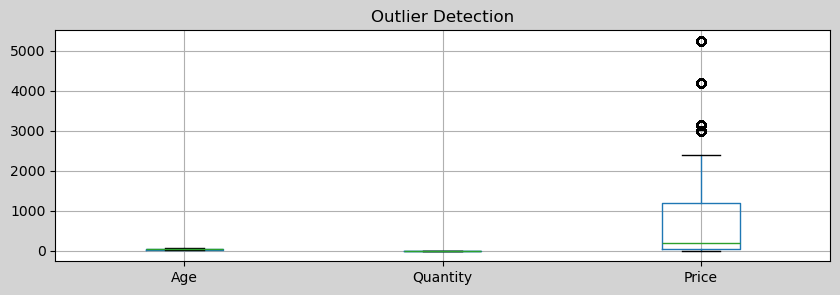

In [16]:
## checking for any outliers

plt.figure(figsize = (10,3), facecolor="lightgrey")
data.boxplot()
plt.grid(True)
plt.title("Outlier Detection")
plt.show()

In [17]:
## dealing with outliers in the price column

q3 = data["Price"].quantile(0.75) ## upper quartile
q1 = data["Price"].quantile(0.25) ## lower quartile

iqr = q3 - q1

## calculating the upper and lower limits

upper_limit = round(q3 + (1.5 * iqr),2)
lower_limit = round(q1 - (1.5 * iqr),2)

print("Upper Quartile:", q3)
print("Lower Quartile:", q1)
print("Inter-Quartile Range:", iqr)
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Quartile: 1200.32
Lower Quartile: 45.45
Inter-Quartile Range: 1154.87
Upper Limit: 2932.62
Lower Limit: -1686.85


In [18]:
## detecting the outliers 

data.loc[(data["Price"] > upper_limit) | (data["Price"] < lower_limit)].shape

(5024, 10)

In [19]:
## removing the data

clean_data = data.loc[(data["Price"] < upper_limit) & (data["Price"] > lower_limit)]

len(clean_data)

94433

In [20]:
## outliers 

print("Outliers:", len(data) - len(clean_data))

Outliers: 5024


### Mining the data for insights 

#### 1. KPIs

In [28]:
## checking the total number of the customers

customer_id = pd.DataFrame(clean_data["Customer ID"].unique())
customer_id = customer_id.rename(columns = { 0 : "Customer ID"})
customer_id.head()

print("Total No of Customers:", len(customer_id["Customer ID"]))

Total No of Customers: 94433


In [40]:
## average price

print("Average Price:", int(round(clean_data["Price"].mean(),0)))

Average Price: 528


In [38]:
## average customer age

print("Average Customer Age:", int(round(clean_data["Age"].mean(),0)))

Average Customer Age: 43


In [42]:
## total number of invoices

invoices = pd.DataFrame(clean_data["Invoice No"].unique())
invoices = invoices.rename( columns = {0 : "Invoices"})
print("Total No of Invoices:", len(invoices["Invoices"]))

Total No of Invoices: 94433


In [44]:
## total quantity

print("Total Quantity:", clean_data["Quantity"].sum())

Total Quantity: 276611


In [46]:
## shopping malls

malls = pd.DataFrame(clean_data["Shopping Mall"].unique())
malls = malls.rename(columns = { 0 : "Malls"})
print("Total No of Shopping Malls:", len(malls["Malls"]))

Total No of Shopping Malls: 10


In [48]:
## product categories

categories = pd.DataFrame(clean_data["Category"].unique())
categories = categories.rename(columns = { 0 : "Category"})
print("Total No of Product Categories:", len(categories["Category"]))

Total No of Product Categories: 8


In [49]:
## more descriptive statitsics about the dataset

clean_data.describe()

,Age,Quantity,Price
count,94433.000000,94433.000000,94433.000000
mean,43.429574,2.929177,528.129519
std,14.986531,1.399855,614.205417
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,900.240000
max,69.000000,5.000000,2400.680000


In [52]:
## more in-depth descriptive statistics

numeric_data = clean_data[["Age", "Quantity", "Price"]]

from scipy.stats import describe

description = describe(numeric_data)

for key, value in description._asdict().items():
    print(f"{key} : {value}")

nobs : 94433
minmax : (array([18.  ,  1.  ,  5.23]), array([  69.  ,    5.  , 2400.68]))
mean : [ 43.42957413   2.9291773  528.12951892]
variance : [2.24596109e+02 1.95959355e+00 3.77248295e+05]
skewness : [0.00810337 0.06144398 1.17883379]
kurtosis : [-1.19701702 -1.27537648  0.48742934]


#### 2. Univariate Analysis

C:\Users\Alvin\AppData\Local\Temp\ipykernel_13964\2685324847.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_data["Age"], color= "black")


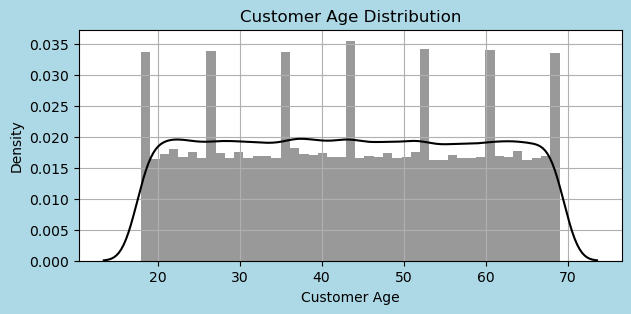

In [60]:
## customer age distribution

plt.figure(figsize = (7,3), facecolor = "lightblue")
sns.distplot(clean_data["Age"], color= "black")
plt.xlabel("Customer Age")
plt.grid(True)
plt.title("Customer Age Distribution", loc="center")
plt.show()

##### Intepretation: the customer age is normally distributed

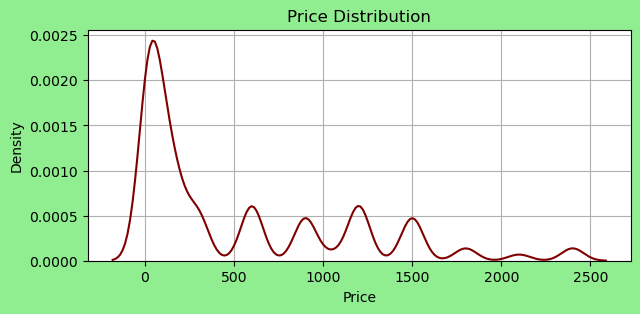

In [59]:
## price distribution

plt.figure(figsize = (7,3), facecolor="lightgreen")
sns.kdeplot(data= clean_data, x="Price", color="maroon")
plt.grid(True)
plt.title("Price Distribution", loc="center")
plt.show()

##### Intepretation: the price is skewed to the left, indicating that more observations are below the value of the mean

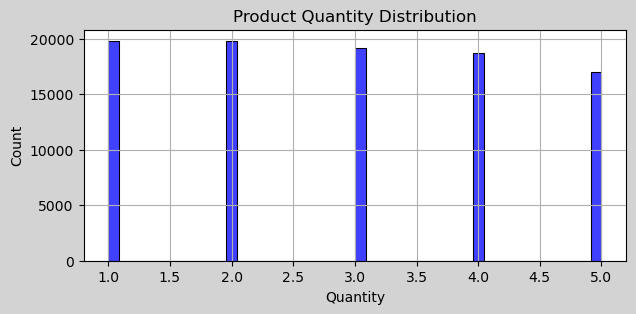

In [61]:
## quantity distribution

plt.figure(figsize = (7,3), facecolor="lightgrey")
sns.histplot(data=clean_data, x="Quantity", color="blue")
plt.grid(True)
plt.title("Product Quantity Distribution")
plt.show()

##### Interpretation: The frequency of the goods on sale across shopping malls is on a downward trend from 1-5, indicating that there could be potential of some goods running out of stock.

#### 3. Bi-variate Analysis 

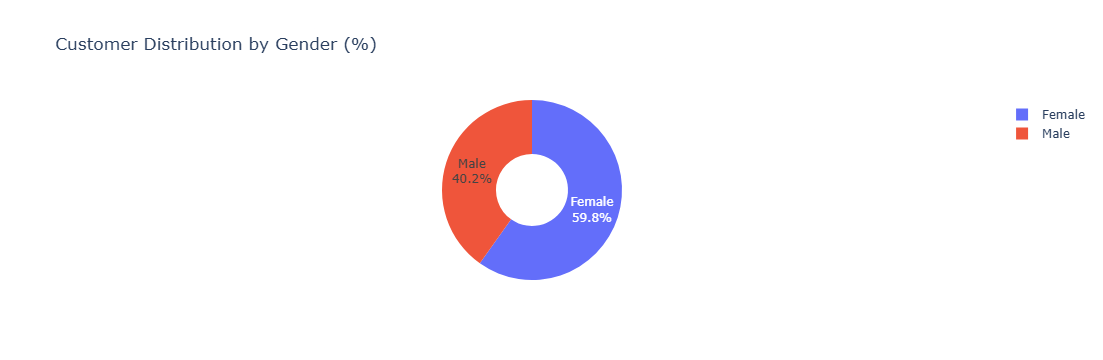

In [73]:
## customer gender distribution

table = pd.pivot_table(data= clean_data, values="Customer ID", index="Gender", aggfunc=np.count_nonzero)
table["Customer ID"] = (table["Customer ID"] / table["Customer ID"].sum()) * 100 ## formating the values as a percentage
table

import plotly.express as px ## libraru for building an interactive chart

table = table.reset_index()  # reset index so Gender becomes a column

# Plotly pie chart
fig = px.pie(
    table,
    names="Gender",
    values="Customer ID",
    title="Customer Distribution by Gender (%)",
    hole=0.4  # optional: donut chart effect
)

# Add labels inside the slices
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',  # shows percentage and category
    hovertemplate='%{label}: %{value:.2f}%'  # hover info
)

fig.show()

##### Interpretation: More female customers are visiting the shopping malls than male thus more female-focused products should be restcoked ofetenly to maximize revenue.

In [76]:
clean_data.head()

,Customer ID,Gender,Age,Payment Method,Invoice No,Category,Quantity,Price,Invoice Date,Shopping Mall
0,C100004,Male,61.0,Credit Card,I178410,Clothing,5,1500.40,26/11/2021,Metrocity
1,C100005,Male,34.0,Cash,I158163,Shoes,2,1200.34,3/3/2023,Kanyon
2,C100006,Male,44.0,Credit Card,I262373,Toys,3,107.52,1/12/2022,Cevahir AVM
3,C100012,Male,25.0,Cash,I334895,Food & Beverage,5,26.15,15/08/2021,Kanyon
4,C100019,Female,21.0,Credit Card,I202043,Toys,1,35.84,25/07/2021,Metrocity


In [80]:
## income per shopping mall

table2 = pd.pivot_table(data=clean_data, values="Customer ID", index="Shopping Mall", aggfunc=np.count_nonzero)
table2["Customer ID"] = (table2["Customer ID"] / table2["Customer ID"].sum()) * 100
table2

,Customer ID
Shopping Mall,
Cevahir AVM,5.007783
Emaar Square Mall,4.840469
Forum Istanbul,4.985545
Istinye Park,9.839781
Kanyon,19.918884
Mall of Istanbul,20.038546
Metrocity,15.118656
Metropol AVM,10.219944
Viaport Outlet,4.938951


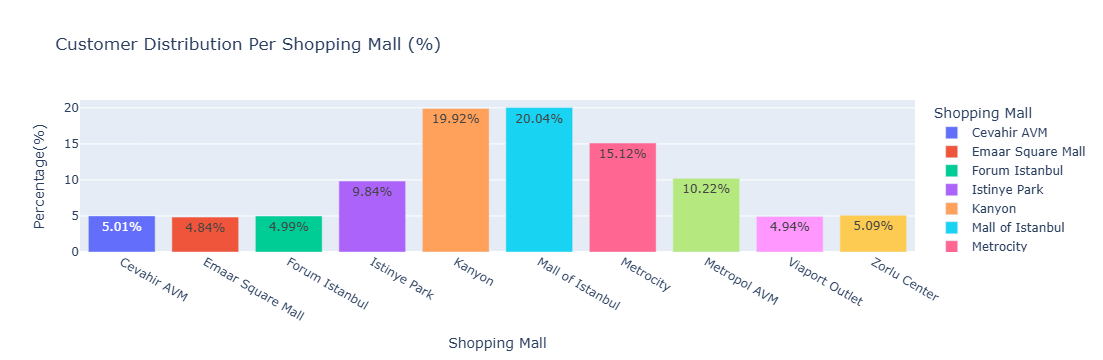

In [85]:
## visualizing the above data

# Reset index for plotting
table_reset = table2.reset_index()

## creating a plotly bar chart for the above data

fig = px.bar(
    table_reset,
    x= "Shopping Mall",
    y= "Customer ID",
    text=table_reset["Customer ID"].round(2).astype(str) + "%",
    title = "Customer Distribution Per Shopping Mall (%)",
    labels = {"Customer ID" : "Percentage (%)", "Shopping Mall" : "Shopping Mall"},
    color = "Shopping Mall"
)

## customizing the layout
fig.update_traces(textposition = "inside")
fig.update_layout(
    yaxis = dict(title="Percentage(%)"),
    xaxis = dict(title="Shopping Mall"),
    uniformtext_minsize = 8,
    uniformtext_mode = "hide"
)

fig.show()

##### Interpretations:
1. The Mall of Istanbul leads with the highest customer distribution (20.04%).
2. The Emmar Square Mall trails with the least customer distribution (4.84%).
3. Based on the above finidngs, more marketing efforts should be invested in the Mall of Istanbul, Kanyon and other high perfoming malls in terms of client distribution to boost retention and maximize revenue. Consequently, more advertising efoorts should be done in lower performing malls to boost client base. 

#### 4. Multivariate analysis

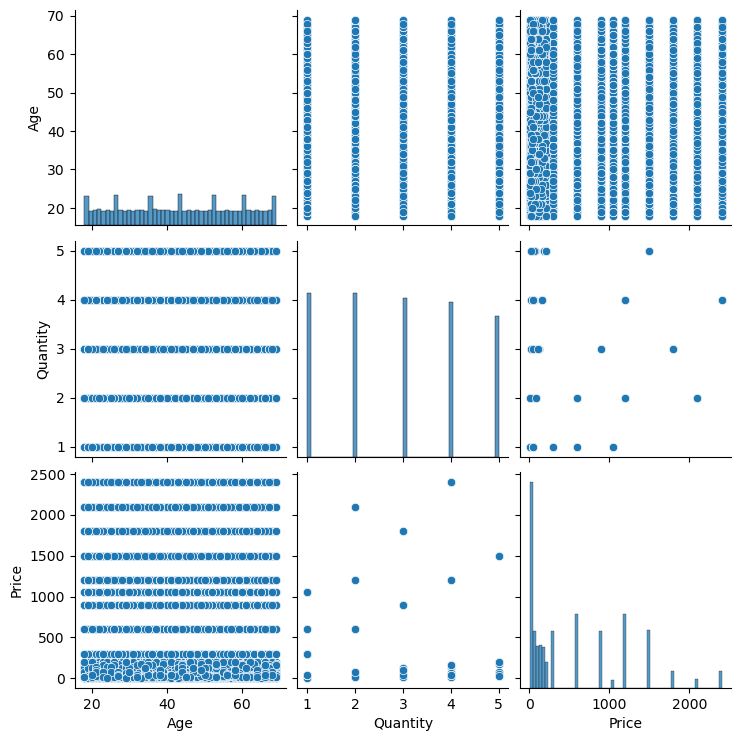

In [87]:
sns.pairplot(data=clean_data)

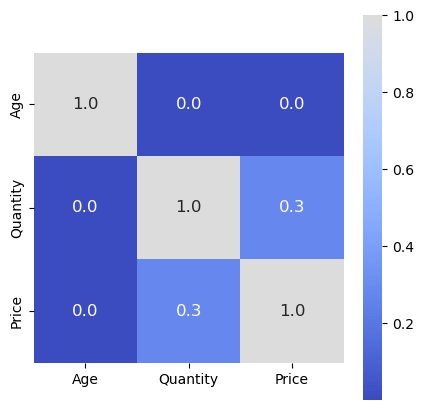

In [92]:
## correlation plot

correlation = numeric_data.corr() ## calculating the correlation between the datasets

plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar=True, annot= True, annot_kws={"size": 12}, fmt = ".1f", square=True, center=True, cmap="coolwarm")
plt.show()

##### Interpretation:
1. There is a strong relationship between price; a clear indication that price is directly affected by changes in quantity.
2. There is no relationship between age, price and quantity; a clear indication that changes in customer age does not affect price or quantity in any way. 